<a href="https://colab.research.google.com/github/manujism/Black-Scholes-Merton-for-European-Options/blob/main/Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Improting libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

In [6]:
#defining the function to calculate option price
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return price, d1, d2

In [7]:
def calculate_greeks(S, K, T, r, sigma, option_type="call"):
    price, d1, d2 = black_scholes(S, K, T, r, sigma, option_type)

    delta = norm.cdf(d1) if option_type == "call" else norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = (- (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
             - r * K * np.exp(-r * T) * norm.cdf(d2 if option_type == "call" else -d2))
    vega = S * np.sqrt(T) * norm.pdf(d1)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2 if option_type == "call" else -d2)

    return {
        "Price": price,
        "Delta": delta,
        "Gamma": gamma,
        "Theta": theta,
        "Vega": vega,
        "Rho": rho
    }

In [8]:
# Generate random values for a stock
K = random.uniform(50, 150)  # Strike price
T = random.uniform(0.1, 2)   # Time to maturity (in years)
r = random.uniform(0.01, 0.05)  # Risk-free rate
sigma = random.uniform(0.1, 0.5)  # Volatility


In [9]:
# Vary stock price over a range
S_values = np.linspace(50, 150, 100)
call_greeks_data = {key: [] for key in ["Price", "Delta", "Gamma", "Theta", "Vega", "Rho"]}
put_greeks_data = {key: [] for key in ["Price", "Delta", "Gamma", "Theta", "Vega", "Rho"]}

for S in S_values:
    call_greeks = calculate_greeks(S, K, T, r, sigma, "call")
    put_greeks = calculate_greeks(S, K, T, r, sigma, "put")

    for key in call_greeks:
        call_greeks_data[key].append(call_greeks[key])
        put_greeks_data[key].append(put_greeks[key])

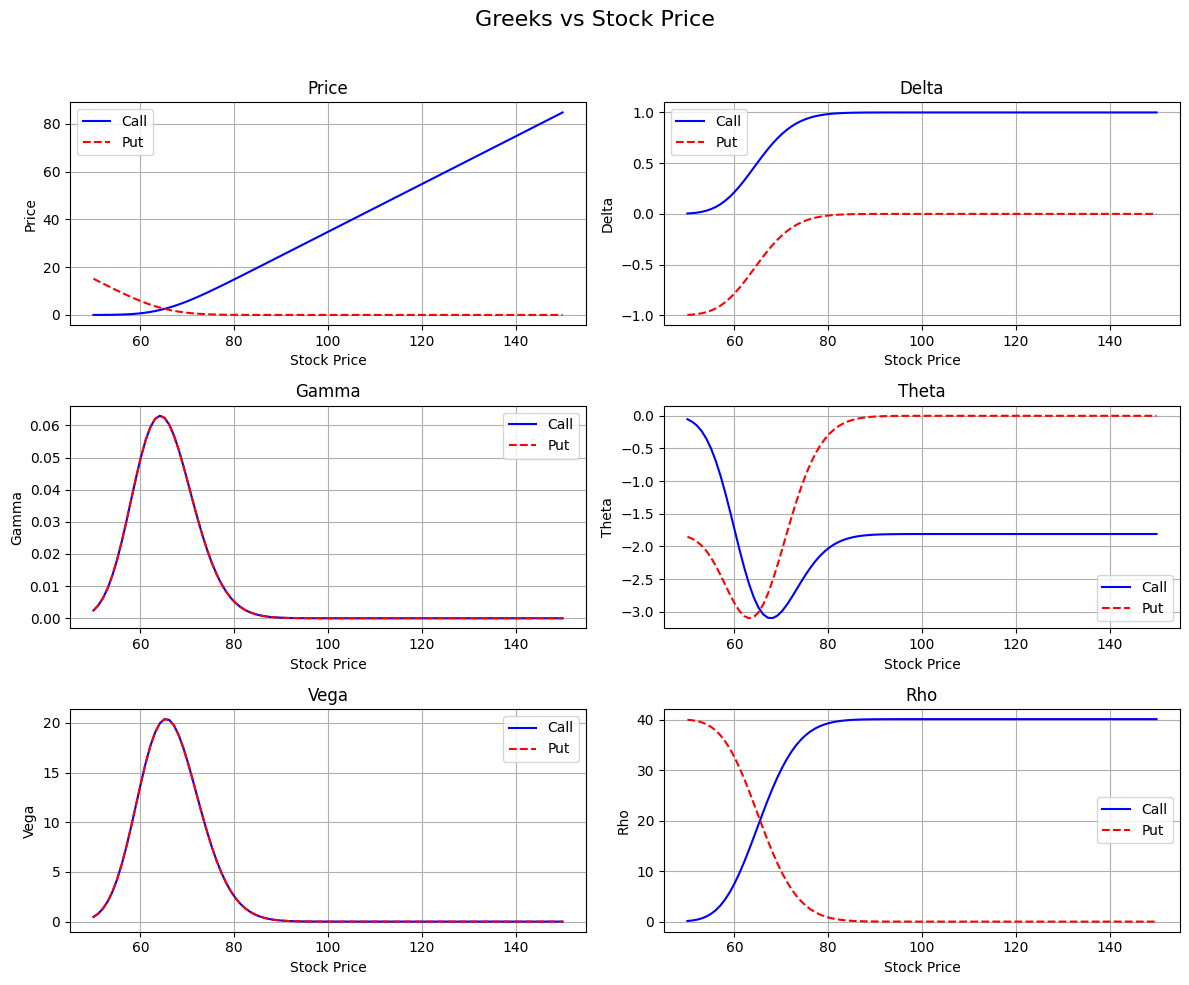

In [10]:
# Plot Greeks vs Underlying Price
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Greeks vs Stock Price", fontsize=16)

greek_names = ["Price", "Delta", "Gamma", "Theta", "Vega", "Rho"]
for i, ax in enumerate(axes.flatten()):
    ax.plot(S_values, call_greeks_data[greek_names[i]], label="Call", color='b')
    ax.plot(S_values, put_greeks_data[greek_names[i]], label="Put", color='r', linestyle='dashed')
    ax.set_title(greek_names[i])
    ax.set_xlabel("Stock Price")
    ax.set_ylabel(greek_names[i])
    ax.legend()
    ax.grid()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()